In [1]:
import sys
sys.path.append('../data')

In [2]:
from script import *

In [59]:
df = read_pickle("../../data/BindingDB_All.pkl")

We will first do some analysis on our dataset

In [4]:
describe(df)

The 5 first rows of the data:
   BindingDB Reactant_set_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   

                                       Ligand SMILES  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   

                                        Ligand InChI  \
0  InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...   
1  InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...   
2  InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...   
3  InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...   
4  InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...   

              Ligand InChI Key  BindingDB MonomerID  \
0  XGEGDSLAQZJGCW-HHGOQMMWSA-N               608

In [5]:
print(f'Number of ligands in the data: {len(ligands_counts(df))}')
print(f'Number of targets in the data: {len(target_counts(df))}')
print(f'Number of sources in the data: {len(target_source_counts(df))}')
print(f'Number of targets in the data that have a source: {len(targets_with_and_without_source(df)[0])}')
print(f"Number of targets in the data that don't have a source: {len(targets_with_and_without_source(df)[1])}")

Number of ligands in the data: 1277349
Number of targets in the data: 6716
Number of sources in the data: 329
Number of targets in the data that have a source: 3703
Number of targets in the data that don't have a source: 3013


In [6]:
print('Sources for the targets:')
for source in sorted(sources(df)) :
    print(source)

Sources for the targets:
Abelson murine leukemia virus
Acinetobacter baumannii
Acinetobacter genomosp. 3
Actinomadura sp. (strain R39)
Aedes aegypti
Aeromonas allosaccharophila
Aeromonas hydrophila
Agaricus bisporus
Agrobacterium sp. ZY-2006e
Alcaligenes sp. (strain DSM 11172)
Alicyclobacillus acidocaldarius
Amphiuma tridactylum
Anura
Apis mellifera
Aquifex aeolicus
Arabidopsis thaliana
Aspergillus aculeatus
Aspergillus fumigatiaffinis
Aspergillus niger
Aspergillus oryzae
Asterina pectinifera
Avian erythroblastosis virus (strain ES4)
Avian myeloblastosis virus
Avian sarcoma virus
Bacillus amyloliquefaciens
Bacillus anthracis
Bacillus cereus
Bacillus cereus (strain ATCC 14579 / DSM 31)
Bacillus clausii
Bacillus lentus
Bacillus licheniformis
Bacillus pasteurii
Bacillus sporothermodurans
Bacillus subtilis
Bacillus thermoproteolyticus
Bacteroides thetaiotaomicron
Bison bison
Bombyx mori
Borrelia burgdorferi
Bos taurus
Bovine viral diarrhea virus (strain CP7)
Brachyspira pilosicoli
Brassica

In [7]:
source_targets_map = targets_for_sources(df)

In [8]:
source_target_num = dict()
for source, targets in source_targets_map.items() :
    source_target_num[source] = len(targets)

In [9]:
if targets_with_multiple_sources(targets_with_and_without_source(df)[0],source_targets_map) :
    print('There are targets with multiple sources')
else :
    print("There aren't targets with multiple sources")

There are targets with multiple sources


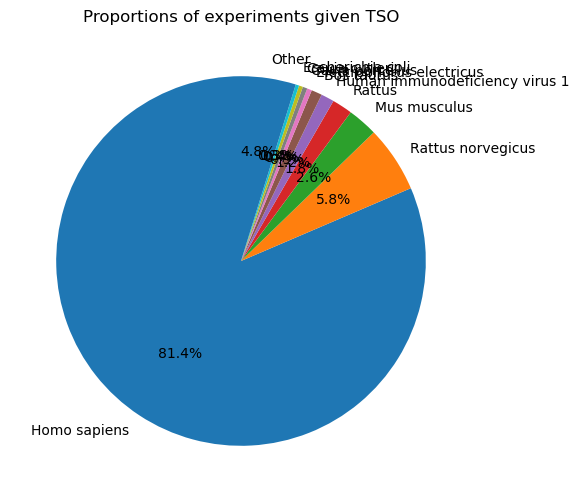

In [10]:
plot_proportions_of_experiments_given_TSO(df)

In [54]:
top_twenty_ligands_with_most_experiments = ligands_counts(df).index.tolist()[:20]
top_twenty_ligands_with_most_experiments_dict = dict(
    {'Ligand1' : top_ten_ligands_with_most_experiments[0], 
    'Ligand2' : top_ten_ligands_with_most_experiments[1],
    'Ligand3' : top_ten_ligands_with_most_experiments[2],
    'Ligand4' : top_ten_ligands_with_most_experiments[3],
    'Ligand5' : top_ten_ligands_with_most_experiments[4],
    'Ligand6' : top_ten_ligands_with_most_experiments[5],
    'Ligand7' : top_ten_ligands_with_most_experiments[6],
    'Ligand8' : top_ten_ligands_with_most_experiments[7],
    'Ligand9' : top_ten_ligands_with_most_experiments[8],
    'Ligand10' : top_ten_ligands_with_most_experiments[9],
    'Ligand11' : top_ten_ligands_with_most_experiments[10],
    'Ligand12' : top_ten_ligands_with_most_experiments[11],
    'Ligand13' : top_ten_ligands_with_most_experiments[12],
    'Ligand14' : top_ten_ligands_with_most_experiments[13],
    'Ligand15' : top_ten_ligands_with_most_experiments[14],
    'Ligand16' : top_ten_ligands_with_most_experiments[15],
    'Ligand17' : top_ten_ligands_with_most_experiments[16],
    'Ligand18' : top_ten_ligands_with_most_experiments[17],
    'Ligand19' : top_ten_ligands_with_most_experiments[18],
    'Ligand20' : top_ten_ligands_with_most_experiments[19]})

In [55]:
top_twenty_targets_with_most_experiments = target_counts(df).index.tolist()[:20]

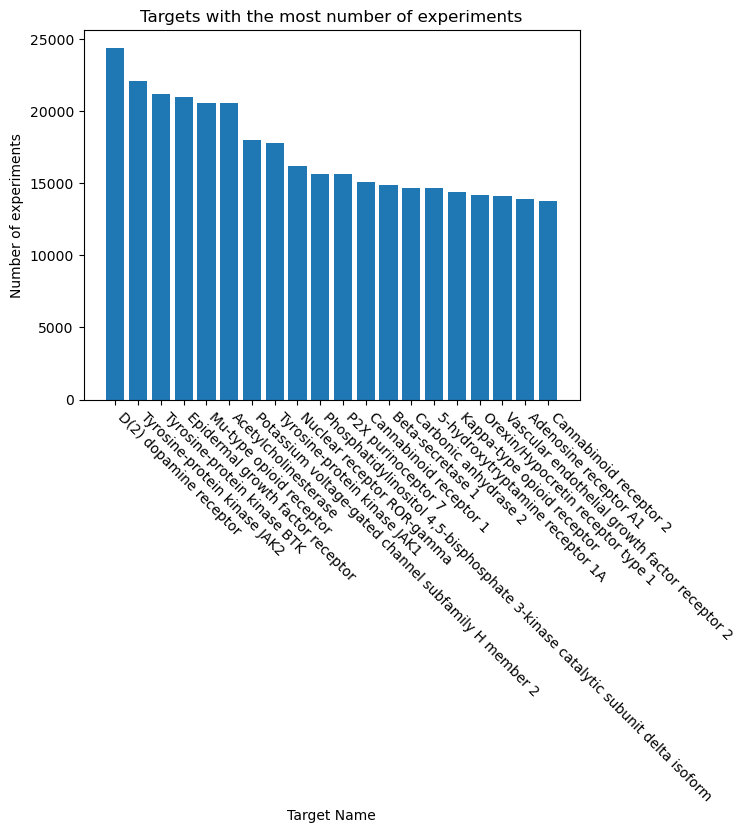

In [56]:
plt.bar(top_twenty_targets_with_most_experiments, target_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Target Name')
plt.ylabel('Number of experiments')
plt.title('Targets with the most number of experiments')
plt.show()

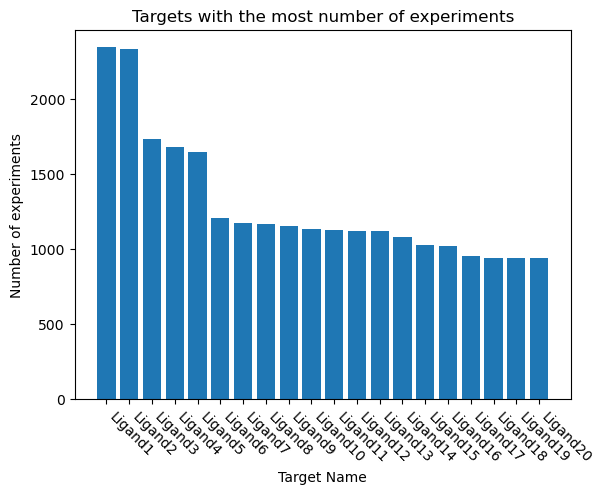

In [57]:
plt.bar(top_twenty_ligands_with_most_experiments_dict.keys(), ligands_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Target Name')
plt.ylabel('Number of experiments')
plt.title('Targets with the most number of experiments')
plt.show()